In [34]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import IPython.display as ipd

from ipynb.fs.full.AF1 import hashData
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import (generate_binary_structure,
                                      binary_erosion)
from scipy.ndimage.morphology import iterate_structure


sampling_rate = 22050

C:\Users\Narwh\AppData\Local\Temp\ipykernel_6620\3441695619.py:9: DeprecationWarning: Please use `maximum_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import maximum_filter
C:\Users\Narwh\AppData\Local\Temp\ipykernel_6620\3441695619.py:10: DeprecationWarning: Please use `generate_binary_structure` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import (generate_binary_structure,
C:\Users\Narwh\AppData\Local\Temp\ipykernel_6620\3441695619.py:10: DeprecationWarning: Please use `binary_erosion` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import (generate_binary_structure,
C:\Users\Narwh\AppData\Local\Temp\ipykernel_6620\3441695619.py:12: DeprecationWarning: Please use `iterate_structure` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` na

# Load and plot audio file in test directory

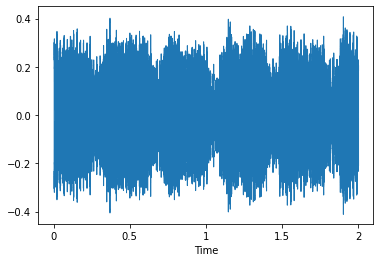

In [29]:
pathAudio = "AudioTest/"
files = librosa.util.find_files(pathAudio, ext=['wav']) 
files = np.asarray(files)
data, sr = librosa.load(files[0])
librosa.display.waveshow(data, sr=sr)

# Compute STFT of Target Audio File

In [5]:
specgram, freqs, times = mlab.specgram(data, NFFT=4096, Fs=sampling_rate, noverlap=int(4096 / 2))
specgram[specgram == 0] = 1e-6

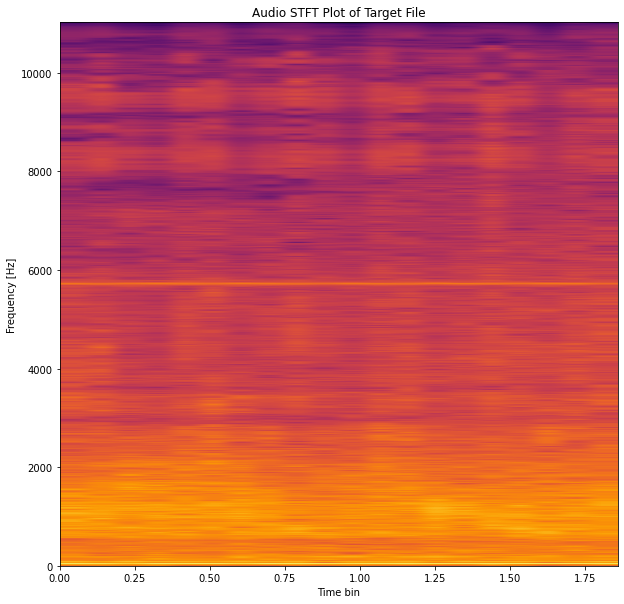

(2049, 20)

In [6]:
fig1 = plt.figure(figsize=(10, 10), facecolor='white')
extent = 0, np.amax(times), freqs[0], freqs[-1] #data coord of bounding box

Z = 10.0 * np.log10(specgram)
Z = np.flipud(Z)

plt.imshow(Z, cmap='inferno', extent=extent)
plt.xlabel('Time bin')
plt.ylabel('Frequency [Hz]')
plt.title('Audio STFT Plot of Target File')
plt.axis('auto')

ax = plt.gca() #get current axes
ax.set_xlim([0, extent[1]])
ax.set_ylim([freqs[0], freqs[-1]])

plt.show()

Z.shape

# Grab Peaks for Target Audio File

In [7]:
# Get 90% cutoff threshold
def find_90_C_k(spec_gram):
    spec_gram = spec_gram[spec_gram != 0] #remove 0's
    specgram_flattened = spec_gram.flatten() #returns copy of orig
    specgram_sorted = np.sort(np.log(np.abs(specgram_flattened)))
    specgram_length = len(specgram_sorted)
    
    ninety_index = int(0.9 * specgram_length)
    ninety_C_k = specgram_sorted[ninety_index]
    return ninety_C_k

In [8]:
def spectogram_to_peaks(specgram, freqs, times):
    fp = generate_binary_structure(2, 1)
    fp = iterate_structure(fp, 20)
    background_threshold = find_90_C_k(specgram)
    peaks = ((specgram == maximum_filter(specgram, footprint = fp)) & (specgram > background_threshold))
    return peaks

In [9]:
peaks_array = spectogram_to_peaks(specgram, freqs, times)
peaks_where = np.where(peaks_array)
y_freq = peaks_where[0]
x_frame = peaks_where[1]

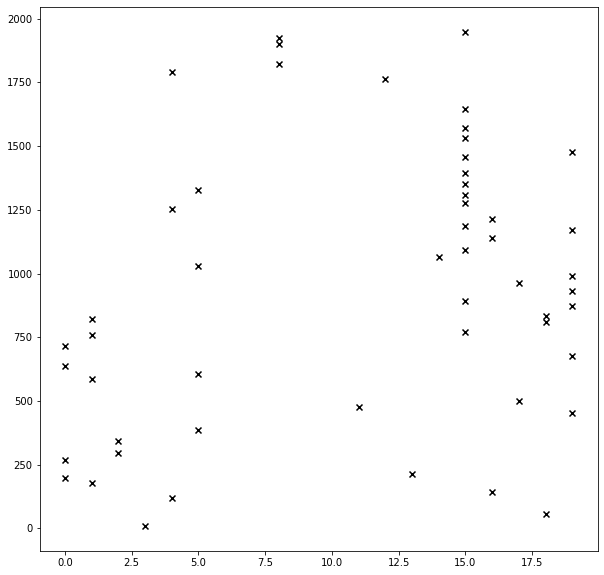

In [10]:
fig2 = plt.figure(figsize=(10, 10), facecolor='white')
plt.scatter(x_frame, y_freq, marker='x', color='black')
plt.show()

# Hash Generation for Target File


In [11]:
import hashlib

def create_fingerprints(peaks):
    hashes = []
    for i in range(len(peaks)):
        for j in range(1, 15):
            if (i + j) < len(peaks):
                t1 = peaks[i][0]
                t2 = peaks[i + j][0]
                freq1 = peaks[i][1]
                freq2 = peaks[i + j][1]
                delta = t2 - t1

                hash = hashlib.sha1(str(str(freq1) + str(freq2) + str(delta)).encode('utf-8'))

                hashes.append((hash.hexdigest(), t1))

    return hashes

# Hash List to Compare

In [17]:
peaksList = list(zip(x_frame, y_freq))
taf = create_fingerprints(peaksList)
taf

[('72e1b5eef991b0b0443df5307581cf81524f1402', 3),
 ('5092b6dfda6da59d4b02a30253f0b88e11c76e59', 3),
 ('462d47f531c31a5449d91746478713afaf916ce6', 3),
 ('4f17e94c76a1d00931f131e0d8246f66c6dc8715', 3),
 ('8d0bf4fc7d8eb6be6a2720b01a186ac8725dc037', 3),
 ('05c559886ccc4811b44301afcab6a992d83e1bc6', 3),
 ('9fd63169c4d75cafae623db10ef3ae52730daa0f', 3),
 ('5a120b1891313d900de3f6f70d343333306db61b', 3),
 ('a6f3e56cd091a0f20a4703db2d09a652e5d7a4aa', 3),
 ('11eddbf45977c1d7fc826fdb9d0f5b5848048df8', 3),
 ('24e22047c1f82ec5a8dab0a88a27866fdcdd7e64', 3),
 ('67b7ff77bd564c50175fe81db6acfcfa1e38c939', 3),
 ('e7e69514479b9f47c7c96c2071a762dab979856c', 3),
 ('aaa5117353c03f5337eaf775d515df8c9981e80c', 3),
 ('885e7ca863ab9f5e1487295bfc2c152a34cc6936', 18),
 ('cc5bdb49019c8142d000712c19dd29980e1dfb8d', 18),
 ('b016e2fbaf813386148b5252c2db9a7e4e88e143', 18),
 ('dc3c807254e9e965f2cb4a2da4e4beb3f7edf62b', 18),
 ('31a3f8d260da84ea9b5e880b99b3c0858452e26e', 18),
 ('d72dcc87c026c8e4d03be69fd6aa96367d467804',